Import necessary libraries

In [36]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
from joblib import dump


Read data from a given file. If you dont have data to train, use the given database "data.cvs"

In [37]:
new_file = input("Hi there! Please provide the name of the data file you want the model to use for predictions:")
database = pd.read_csv(f"{new_file}.csv")

#set data frame to display the table
pd.DataFrame(database)



,Customer ID,Age,Gender,Marital Status,Number of Dependents,Education,Employment Status,Annual Income,Credit Score,Loan Amount,Loan Term,Loan Approval
0,2309,56,Other,Divorced,4,Some College,Employed,216518,732,20136,15,1
1,7716,74,Other,Divorced,4,PhD,Self-employed,175971,748,19455,15,1
2,5774,62,Other,Divorced,3,High School,Employed,194407,826,18794,20,1
3,3424,30,Male,Single,3,Bachelor's,Unemployed,225191,362,7004,5,0
4,4488,74,Male,Divorced,2,Some College,Self-employed,209285,564,48886,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,1445,54,Male,Divorced,2,Some College,Unemployed,46799,586,13437,10,0
996,4869,70,Other,Single,0,Master's,Unemployed,149082,723,14066,30,1
997,7988,18,Female,Divorced,2,High School,Unemployed,50432,514,45534,10,0
998,5504,18,Male,Married,1,Some College,Unemployed,106415,512,20098,10,0


Set the target colum and drop unnecessary data that could cause in biases

In [38]:
target = "Loan Approval"
y = database[target]
x = database.drop(columns=[target,"Gender","Age"], axis = 1)

#since GaussianNB takes only binary, convert the strings inside the database to binary
x = pd.get_dummies(x)
pd.DataFrame(x)
x


,Customer ID,Number of Dependents,Annual Income,Credit Score,Loan Amount,Loan Term,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Education_Bachelor's,Education_High School,Education_Master's,Education_PhD,Education_Some College,Employment Status_Employed,Employment Status_Self-employed,Employment Status_Unemployed
0,2309,4,216518,732,20136,15,True,False,False,False,False,False,False,True,True,False,False
1,7716,4,175971,748,19455,15,True,False,False,False,False,False,True,False,False,True,False
2,5774,3,194407,826,18794,20,True,False,False,False,True,False,False,False,True,False,False
3,3424,3,225191,362,7004,5,False,False,True,True,False,False,False,False,False,False,True
4,4488,2,209285,564,48886,30,True,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1445,2,46799,586,13437,10,True,False,False,False,False,False,False,True,False,False,True
996,4869,0,149082,723,14066,30,False,False,True,False,False,True,False,False,False,False,True
997,7988,2,50432,514,45534,10,True,False,False,False,True,False,False,False,False,False,True
998,5504,1,106415,512,20098,10,False,True,False,False,False,False,False,True,False,False,True



Split the data and build the model using naive bayes


In [39]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .2, train_size=.8, random_state = 100)

#train model using naive bayes 
model = GaussianNB()
model.fit(x_train,y_train)

print(x_train)


     Customer ID  Number of Dependents  Annual Income  Credit Score  \
675         5608                     3          61070           607   
358         7894                     0         245092           717   
159         3651                     4          21571           775   
533         1435                     1          25284           534   
678         5961                     0          33399           622   
..           ...                   ...            ...           ...   
855         8158                     2         131634           511   
871         8611                     1          96096           377   
835         8499                     1          33288           566   
792         8234                     2         232049           766   
520         5926                     1         160724           842   

     Loan Amount  Loan Term  Marital Status_Divorced  Marital Status_Married  \
675        20296         30                    False               

Set up the Predictiction model using test data, if the customer eligble for getting a loan


In [40]:
y_predict = model.predict(x_test)



Evaluate the model performace


Accuracy Score: 0.95
Recall Score: 1.00
Precision Score: 0.87


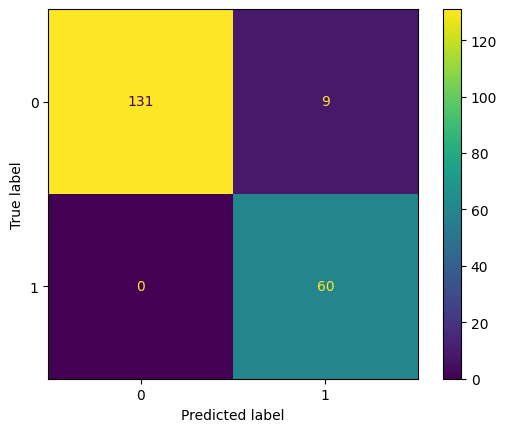




              precision    recall  f1-score   support

           0       1.00      0.94      0.97       140
           1       0.87      1.00      0.93        60

    accuracy                           0.95       200
   macro avg       0.93      0.97      0.95       200
weighted avg       0.96      0.95      0.96       200



In [41]:
#print accuracy and other reports
accuracy_score = accuracy_score(y_test,y_predict)
recall_score = recall_score(y_test,y_predict, average= "binary")
precision_score = precision_score(y_test,y_predict,average= "binary")
print(f"Accuracy Score: {accuracy_score:.2f}")
print(f"Recall Score: {recall_score:.2f}")
print(f"Precision Score: {precision_score:.2f}")


cm = confusion_matrix(y_true=y_test, y_pred = y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

print("\n\n")
# Print classification report (Full report)
print(classification_report(y_test, y_predict))



Save the model for testing other data

In [42]:
dump(model,'saved model.joblib') #save the training model and the knoweldge gained for future usage

['saved model.joblib']